<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/Copia_de_PyPCD_tareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tema 1.2

### Tarea 1.2.1
Clasificar las muestras siguientes utilizando k=2 :
[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11],
[8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]

### Desarrollo
Tarea correspondiente a Kmeans

In [ ]:
from sklearn . cluster import KMeans
import numpy as np

# Datos con los cuales se van a trabajar
x = [[1, 12.5], [3, 10.5], [3, 12.5], [3, 14.5], [3, 18], [5, 18], [5, 16], [5, 14.5], [5, 13], [6, 9], [8, 10], [9, 11], [8.5, 12], [7, 13.5], [8, 16], [0.5, 10.5]]
x  = np.array(x)
#####
## Inicio Kmeans
#####

# Se usará dos clusters, k = 2
k = 2
kmeans = KMeans(n_clusters=k)

# Realizando ajuste
kmeans = kmeans.fit(x)

# Etiquetas de cada clase
y = kmeans.predict(x)

# Centroides obtenidos
c = kmeans.cluster_centers_

y = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


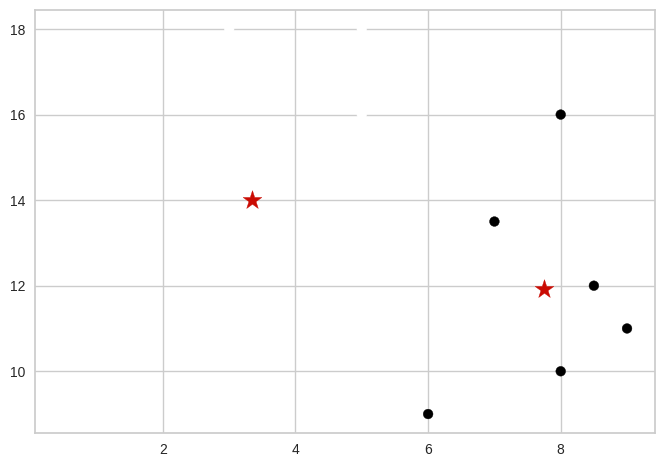

In [ ]:
## Graficando clasificación de la muestras
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(c[:,0], c[:,1], marker='*', s=200, c='r')

## Tarea 1.2.2

Aplica los modelos de agrupamiento presentados a los conjuntos Iris y Digits; compara los resultados de cada uno de ellos.

### Desarrollo
Primero se manipula el conjunto de datos de entrenamiento

In [ ]:
# Conjunto con el cual se va a trabajar
import pandas as pd
df_iris = pd.read_csv('https://bit.ly/38XWXS4' , header = None) # Conjunto iris
df_iris.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np


# En este caso el conjunto de entrenamiento que nos servir son el conjunto de características 1 al 3 y la posicion 4 es la categoría
x_iris = df_iris.iloc[:,[0, 1, 2, 3]].values
x_iris = np.array(x_iris)
y_iris = np.array(df_iris.iloc[:,4].values) # Aunque no se usa puesto que es cluster

class_values = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': -1,
}

# Asignar valores según el diccionario
y_iris = np.array([class_values[cls] for cls in y_iris])

print("Etiquetas",y_iris)
np.unique(y_iris)

Etiquetas [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


array([-1,  0,  1])

### Usando kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

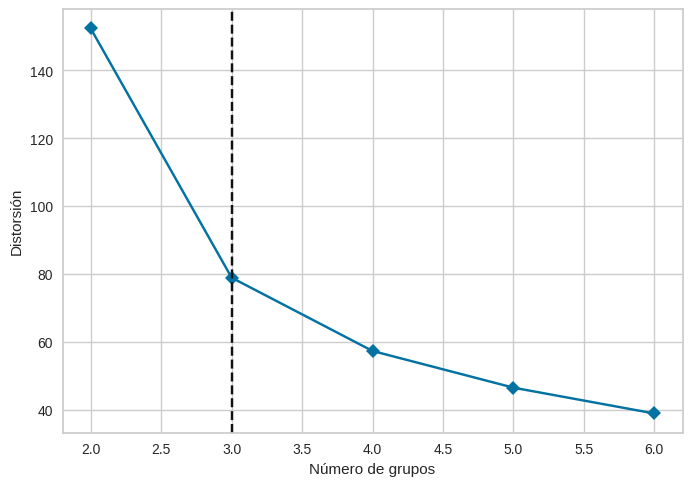

In [ ]:
# Primero Kmeans
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick . cluster import KElbowVisualizer

# Se debe de saber el ideal de k, para este caso podemos usar la cantidad de etiquetas diferentes que tenemos o tal cual usar la gráfica de codo
visualizer=KElbowVisualizer ( KMeans () , k =(2,7) , timings = False ) # Se espera que haya 3 clusters
visualizer.fit(x_iris)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Conjunto original')

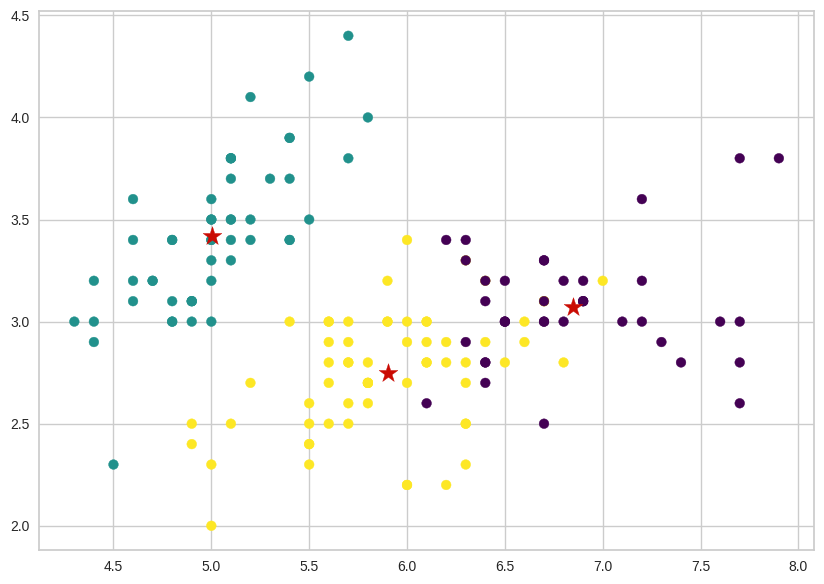

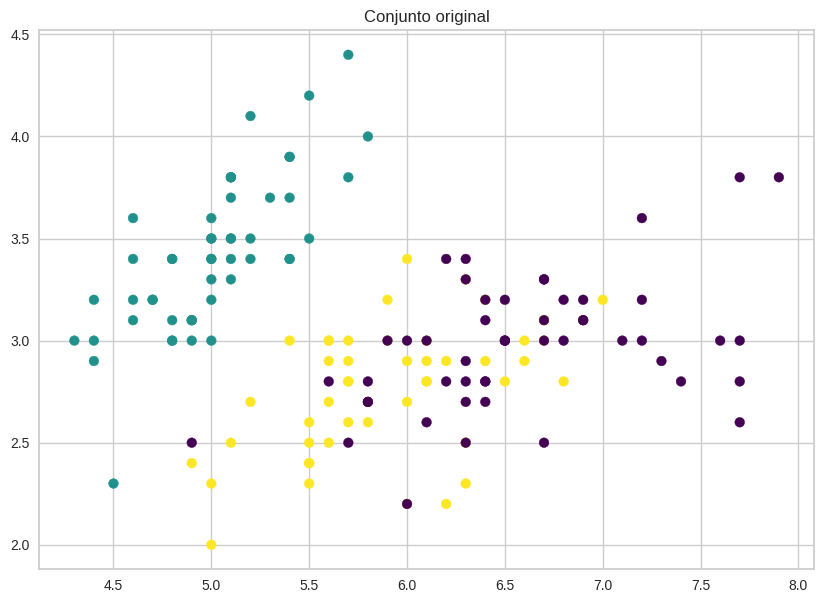

In [ ]:
## Al parecer es 8
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(x_iris)
y_prediction = kmeans.predict(x_iris)
c = kmeans.cluster_centers_
y_labels = kmeans.labels_

# Resultado
plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_labels, cmap='viridis') # Dos características
plt.scatter(c[:,0], c[:,1], marker='*', s=200, c='r') # Se puede ver que le cuesta para estas dos características

plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_iris, cmap='viridis')
plt.title("Conjunto original")

### Usando aglomeración
Se recuerda que el de aglomeración va tender a unificarse en un solo grupo, pero tenemos que ver el historial de agrupamiento para poder escoger el más óptimo

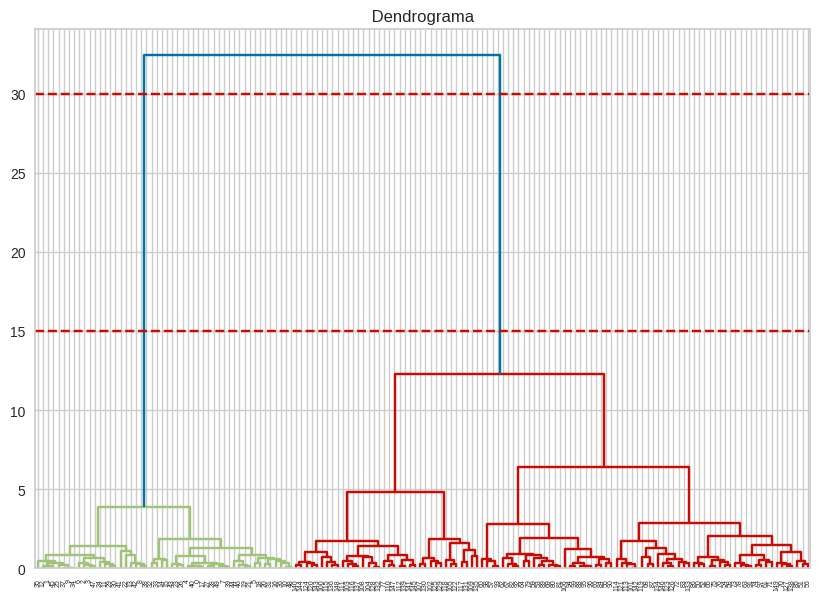

In [ ]:
# Segundo Aglomeración
import scipy . cluster . hierarchy as sch

plt . figure ( figsize =(10 , 7))
plt . title (" Dendrograma ")
dend = sch . dendrogram ( sch.linkage(x_iris , method = 'ward'))
plt.axhline (y =30 , color ='r', linestyle = '--')
plt.axhline (y =15 , color ='r', linestyle = '--')

Es importante ver que no está claro la existencia de un tercer cluster, por lo cual el dendograma sugiere que solo existen 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


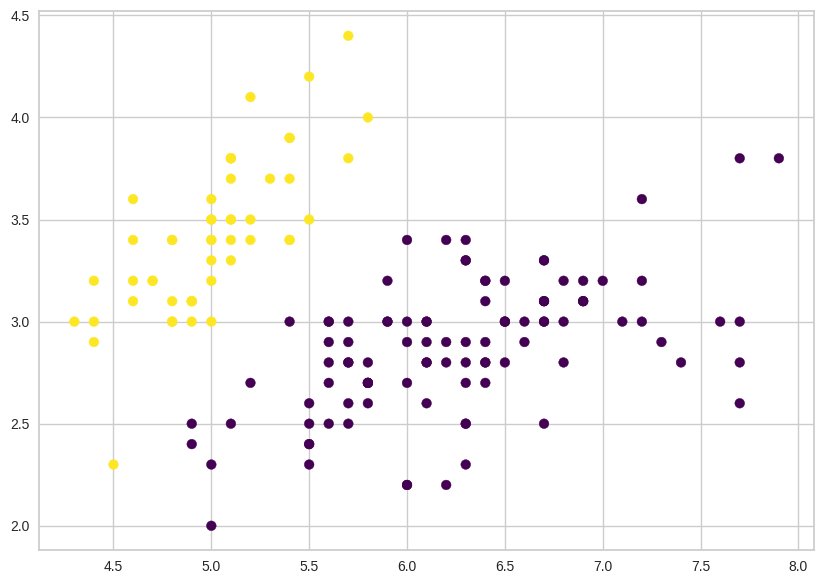

In [ ]:
from sklearn . cluster import AgglomerativeClustering
cluster = AgglomerativeClustering ( n_clusters =2 , affinity ='euclidean' ,
linkage ='ward')
cluster.fit_predict( x_iris )

plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0], x_iris[:,1], c =cluster.labels_ ,cmap='viridis') # No parece funcionar tan bien

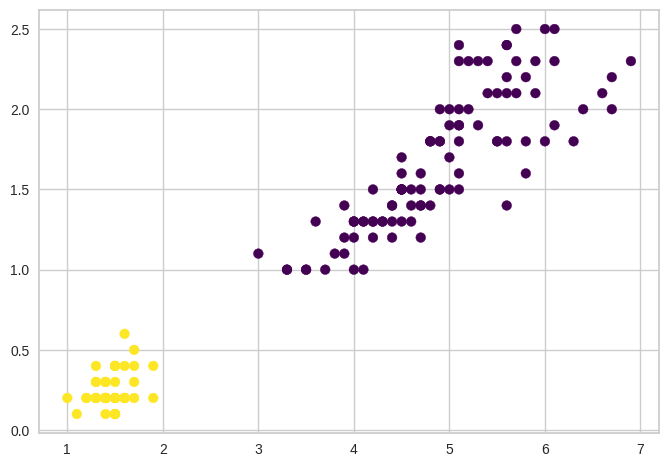

In [ ]:
plt.scatter(x_iris[:,2], x_iris[:,3], c =cluster.labels_ ,cmap='viridis')

### Usando Mezclas gaussianas

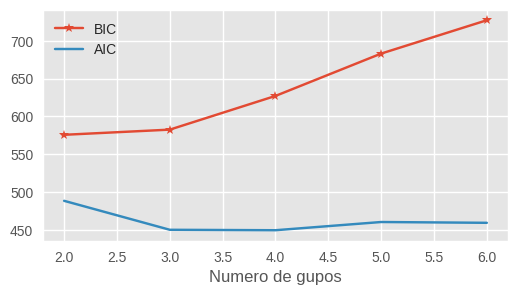

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,3)
plt.style.use('ggplot')

from sklearn.mixture import GaussianMixture


nc =np.arange(2,7)
models = [GaussianMixture(n,covariance_type='full',random_state=0).fit(x_iris) for n in nc]
## obteniendo la informacion bayesiana.
plt.plot(nc,[m.bic(x_iris) for m in models], label='BIC',marker='*')

## obteniendo la informacion akaite.
plt.plot(nc,[m.aic(x_iris) for m in models], label='AIC',marker='+')

plt.legend();
plt.xlabel('Numero de gupos');

Text(0.5, 1.0, 'Conjunto original')

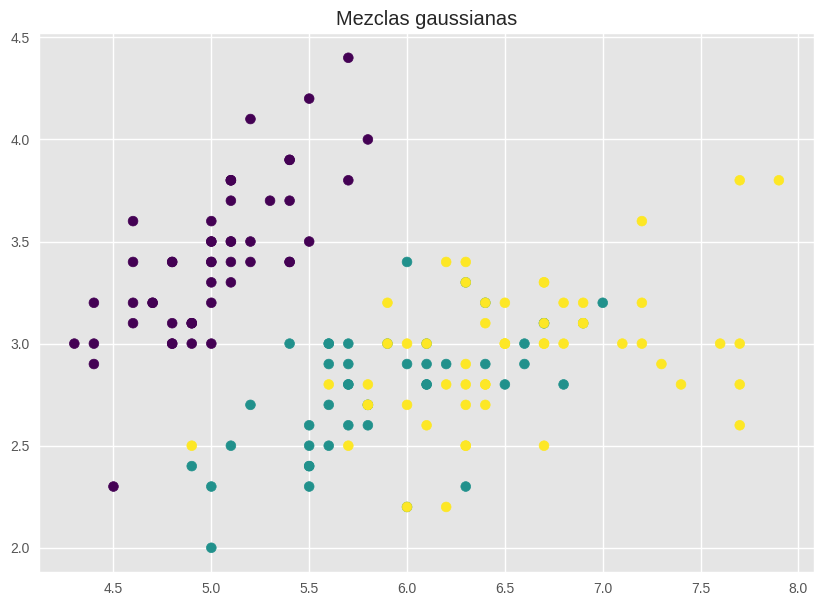

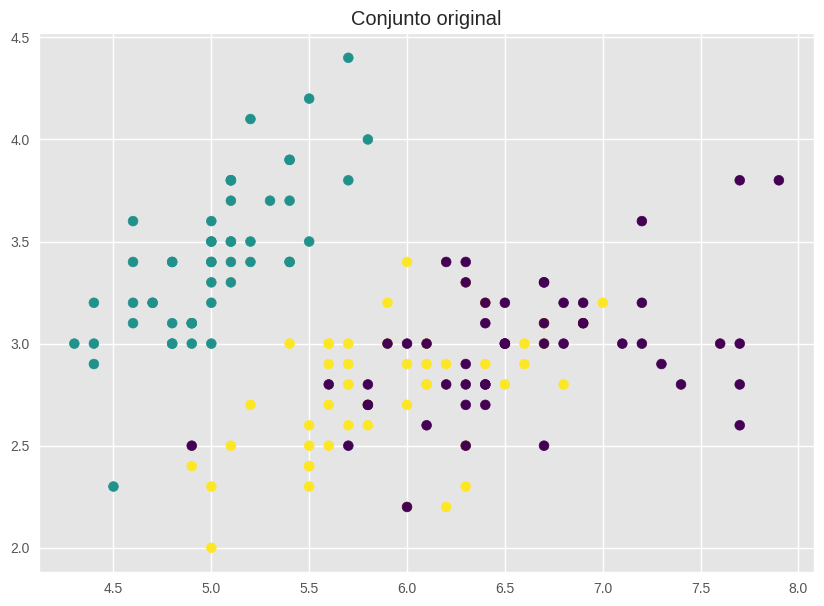

In [ ]:
gm = GaussianMixture(n_components=3)
gm.fit(x_iris)

y_hat = gm.predict(x_iris)

plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0],x_iris[:,1],c=y_hat,cmap='viridis')
plt.title("Mezclas gaussianas")

plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_iris, cmap='viridis')
plt.title("Conjunto original")

  Usando DBSCAN
  
  A common rule of thumb is to set min_samples equal to the number of features in your dataset plus one. For example, if you have 4 features, you might start with min_samples=5.

Counter({1: 84, 0: 49, -1: 17}) 

       0    1    2    3
41   4.5  2.3  1.3  0.3
57   4.9  2.4  3.3  1.0
60   5.0  2.0  3.5  1.0
68   6.2  2.2  4.5  1.5
87   6.3  2.3  4.4  1.3
93   5.0  2.3  3.3  1.0
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
106  4.9  2.5  4.5  1.7
108  6.7  2.5  5.8  1.8
109  7.2  3.6  6.1  2.5
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0
134  6.1  2.6  5.6  1.4
135  7.7  3.0  6.1  2.3
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


Text(0.5, 1.0, 'Conjunto original')

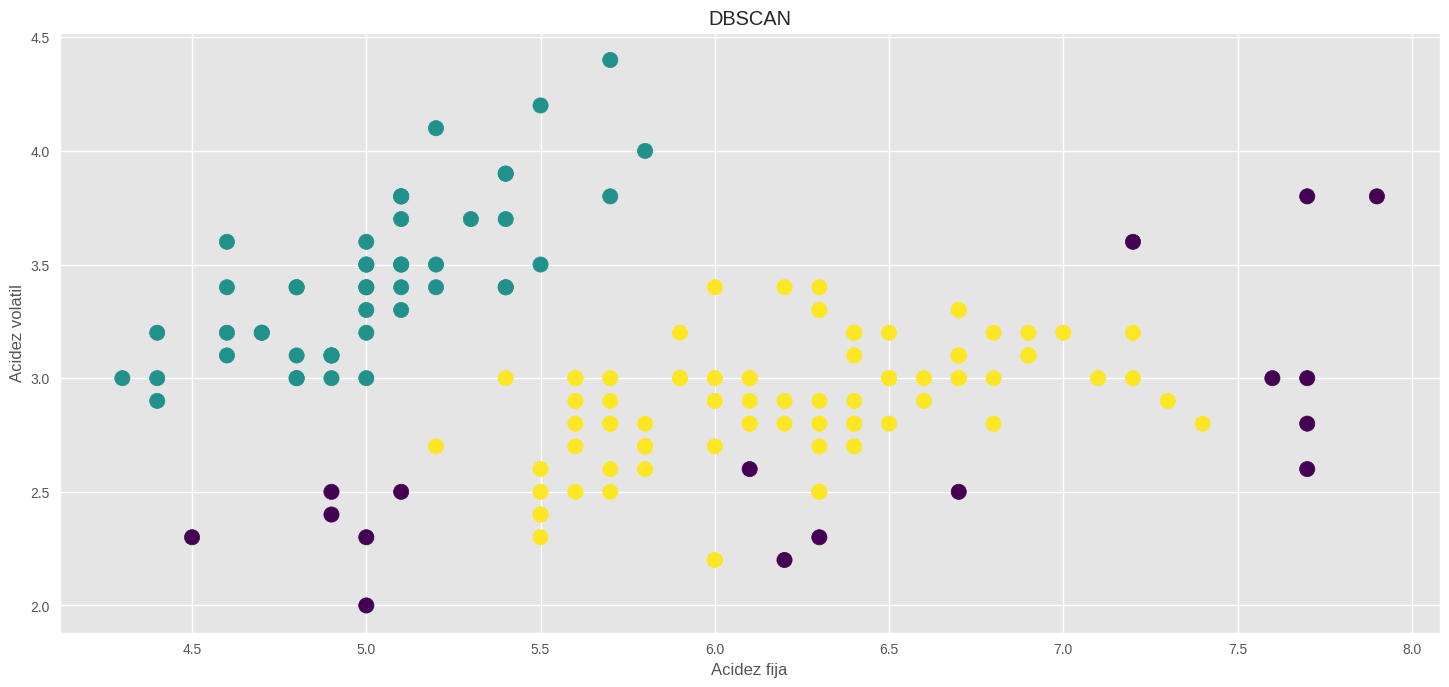

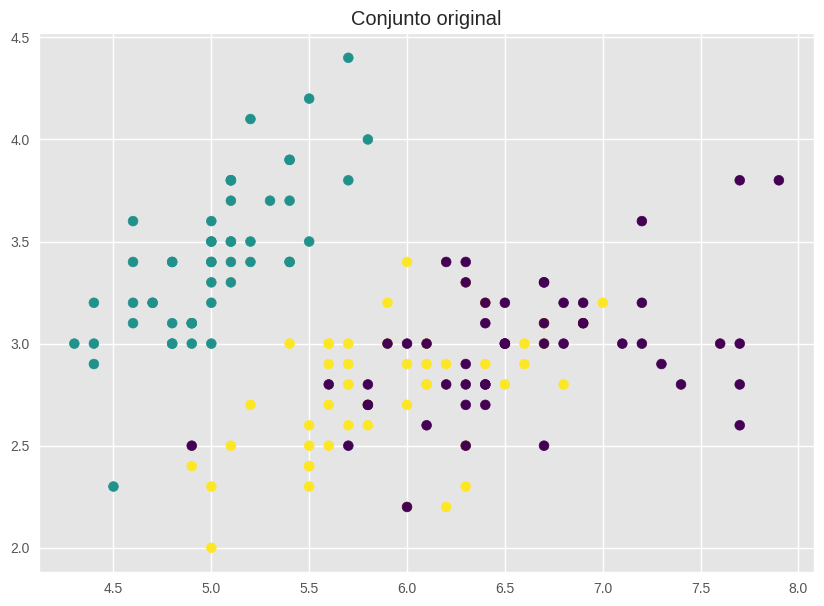

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(x_iris)

from collections import Counter

print(Counter(dbscan.labels_),'\n')
df_aux = pd.DataFrame(x_iris)
print(df_aux[dbscan.labels_ ==-1])

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2.3,2])

clusters = dbscan.labels_
print(clusters)

ax.scatter(x_iris[:,0], x_iris[:,1], c=clusters,s=120, cmap='viridis')
ax.set_xlabel('Acidez fija')
ax.set_ylabel('Acidez volatil')
plt.title('DBSCAN')

plt.figure ( figsize =(10 , 7))
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_iris, cmap='viridis')
plt.title("Conjunto original")

### Para este conjunto se observa que tiene mejor comportamiento el de mezclas gaussianas, seguido de k medias, despues k medias, DBSSCAN, aglomeracion


### Conjunto de datos de digits

In [ ]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


### Usando kmeans
Recordamos que se puede asignar k usando la grafica de codo

Para este caso se hizo uso de PCA para poder hacer la reduccion de las 64 dimensiones a tan solo 2 dimensiones y poder aplicar el clustering, pero esto es para permitir proyectar en un espacio de dos dimensiones y aplicar cluster aqui.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

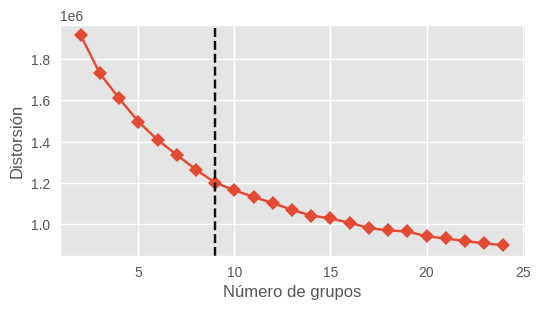

In [ ]:
# Primero Kmeans
from sklearn . cluster import KMeans
import numpy as np
from yellowbrick . cluster import KElbowVisualizer

# Se debe de saber el ideal de k, para este caso podemos usar la cantidad de etiquetas diferentes que tenemos o tal cual usar la gráfica de codo
visualizer=KElbowVisualizer ( KMeans () , k =(2,25) , timings = False ) # Se espera que haya 3 clusters
visualizer.fit(data)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

In [ ]:
# Usando el grafico de codo, aunque en si nosotros sabenmos que son 10 datos
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)

kmeans  = KMeans(init="k-means++", n_clusters=n_digits)
# K means es una inicializacion inteligente para la convergencia
# Se asigna 10 clsuters,
kmeans = kmeans.fit(reduced_data)

y_prediction = kmeans.predict(reduced_data)
c = kmeans.cluster_centers_
y_mean_labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Usando aglomeracion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


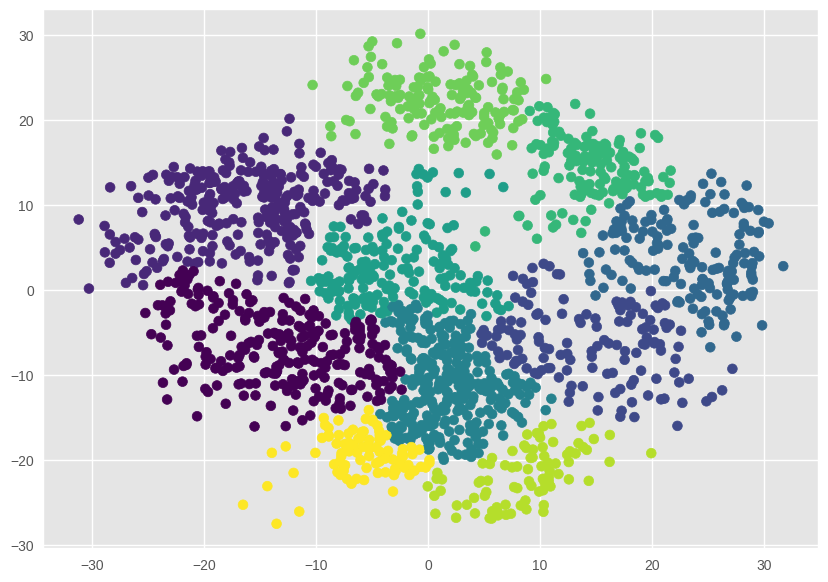

In [ ]:
from sklearn . cluster import AgglomerativeClustering
cluster = AgglomerativeClustering ( n_clusters = n_digits , affinity ='euclidean' ,
linkage ='ward')
cluster.fit_predict( reduced_data )

plt.figure ( figsize =(10 , 7))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c =cluster.labels_ ,cmap='viridis') # No parece funcionar tan bien

### Usando Mezclas gaussianas

Text(0.5, 1.0, 'Mezclas gaussianas')

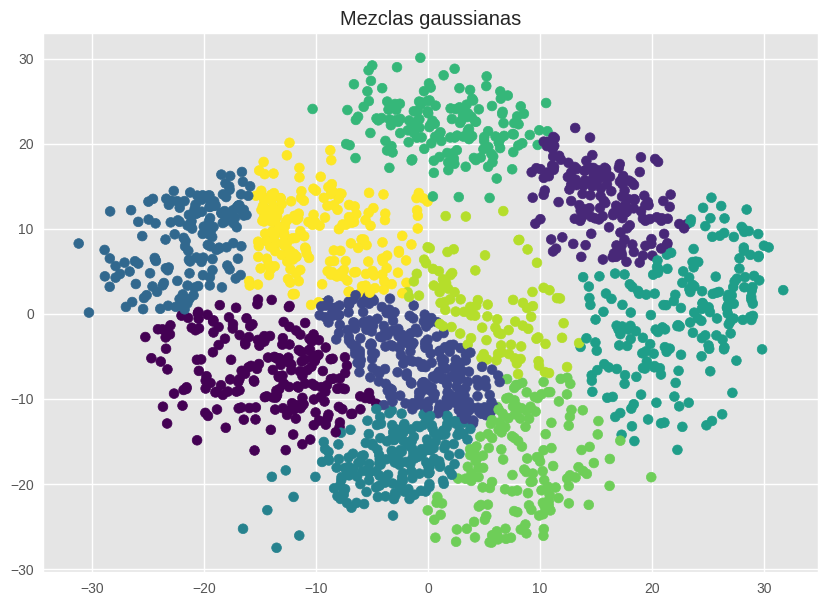

In [ ]:
gm = GaussianMixture(n_components=n_digits)
gm.fit(reduced_data)

y_hat = gm.predict(reduced_data)

plt.figure ( figsize =(10 , 7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=y_hat,cmap='viridis')
plt.title("Mezclas gaussianas")



### Usando DBSCAN

Text(0.5, 1.0, 'DBSCAN')

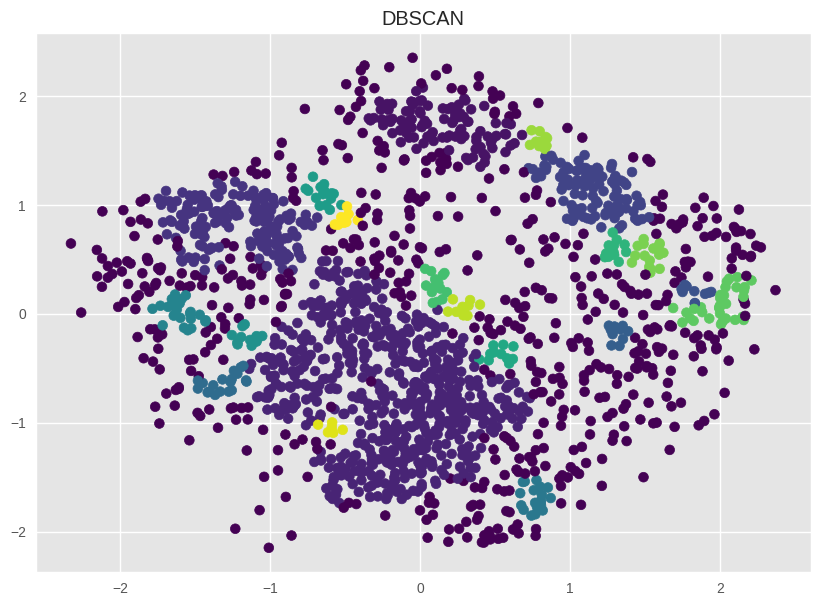

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(reduced_data)
scaled_p = scaler.transform(reduced_data)


dbscan = DBSCAN(eps=0.122, min_samples=10).fit(scaled_p)
from collections import Counter

df_aux = pd.DataFrame(scaled_p)

clusters = dbscan.labels_

plt.figure ( figsize =(10 , 7))
plt.scatter(scaled_p[:,0], scaled_p[:,1], c=clusters, cmap='viridis')
plt.title('DBSCAN')


PCA time:  3.0148379802703857


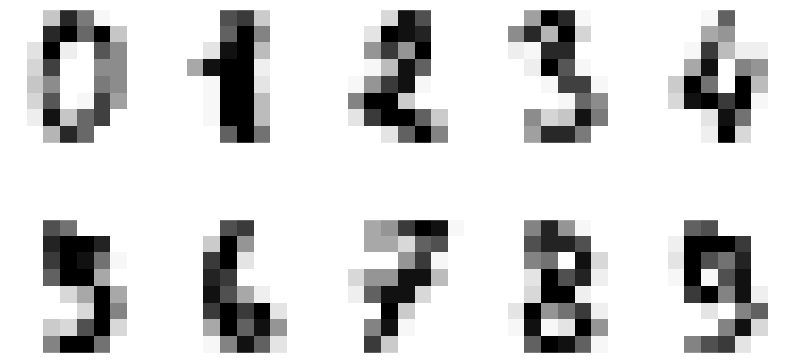

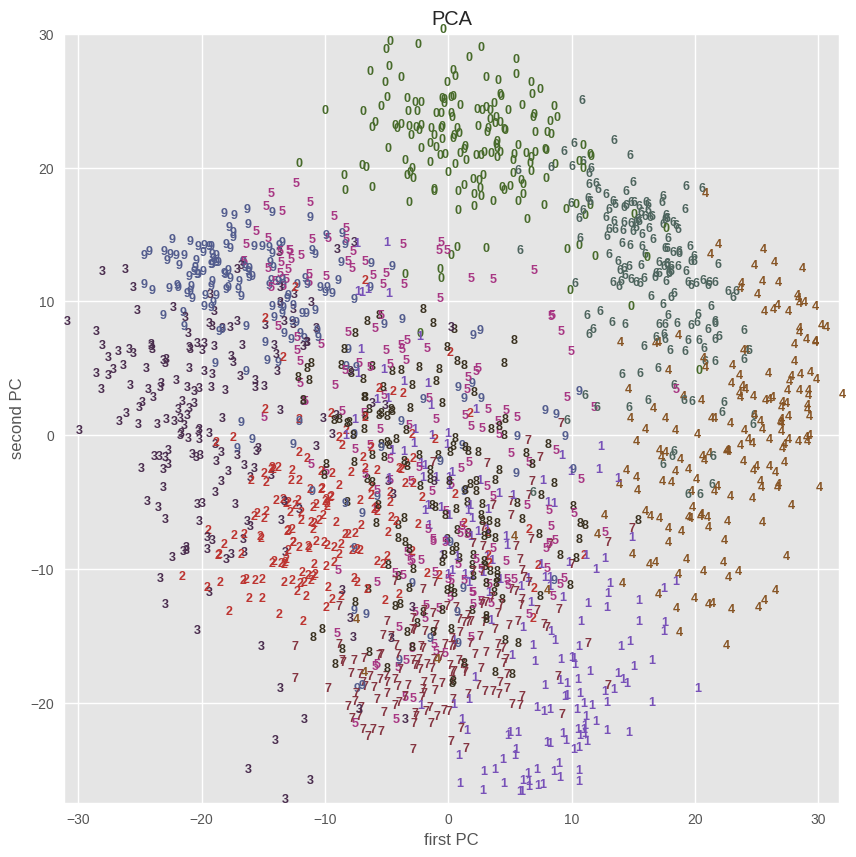

number of clusters in pca-DBSCAN:  20
DBSCAN time:  0.07817888259887695


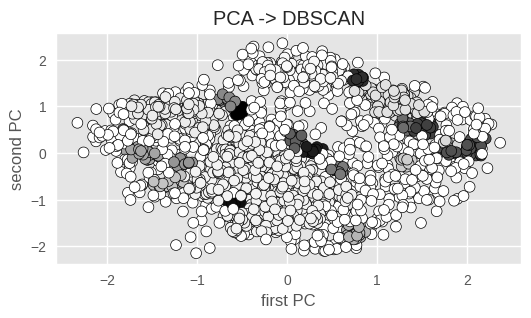

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-MEANS time:  0.741255521774292


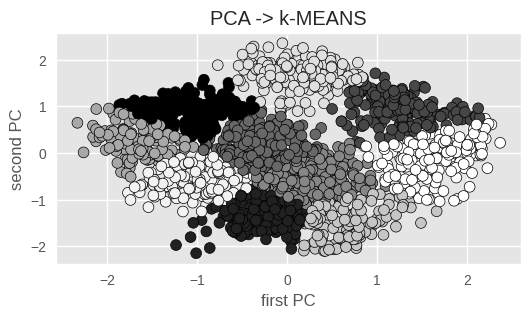

[2 3 5 ... 5 9 6]
[ 0 -1  1 ... -1 -1 -1]


In [ ]:
# Codigo de comprobacion
import sys
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

# print len(digits.data) #1797
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E']

t0=time()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("PCA time: ", time()-t0)
plt.show()

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(digits_pca)
scaled_p = scaler.transform(digits_pca)


#PCA -> DBSCAN
t2 = time()
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.122, min_samples=10).fit(scaled_p)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters in pca-DBSCAN: ", n_clusters_)

plt.scatter(scaled_p[:,0], scaled_p[:,1], c=labels, s=60, edgecolors='black')
plt.title('PCA -> DBSCAN')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("DBSCAN time: ", time()-t2)
plt.show()



#PCA -> k-MEANS
t3 = time()
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(scaled_p)

plt.scatter(scaled_p[:,0], scaled_p[:,1], c=labels_km, s=60, edgecolors='black')
plt.title('PCA -> k-MEANS')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("k-MEANS time: ", time()-t3)
plt.show()


print (labels_km)
print (labels)

#Tarea 1.3.1
♢ Demuestra que para 0 < $\alpha$ < 1, se cumple que $1=\sum_{i=1}^\infty \alpha(1-\alpha)^{i-1}$



*Solución*: Usando el **criterio de convergencia** de series geométricas:

 Si $ \sum_{i=1}^\infty \alpha \, r^{i-1} $, donde $|r|<1$, entonces la serie converge a $\frac{\alpha}{1-r}$

Vemos que $|r|=|1-\alpha| <1$, pues $\alpha<1$, entonces por el criterio se converge a:
$$ \frac{\alpha}{1-(1-\alpha)}=\frac{\alpha}{\alpha}=1$$

O sea que $\sum_{i=1}^\infty \alpha(1-\alpha)^{i-1}=1$

#1.3.2

♢ Con $x_0 = [27, 35]^T$
, suponiendo que existen tres propietarios y que
$π_{1,1}$ = 0.5, $π_{1,2}$ = 0.3,
$π_{2,1}$ = 0.3, $π_{2,2}$ = 0.4, $π_{3,1}$ = 0.4 y $π_{3,2}$ = 0.5:
• Calcula Pr (x0|y0 = Pk) para k = 1, 2, 3 y determina la predicción:
$$\hat{y}_0 = arg max \{Pr (x0|y0 = P_1),Pr (x0|y0 = P_2),Pr (x0|y0 = P_3)\}$$




Sabemos que $$Pr(x0|y0 = P_k) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{k,1}^{x_{0,1}}\times \dots \times \pi_{k,1}^{x_{0,n}} $$
$$
= \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\Pi_{i=1}^{n}\pi_{k,1}^{x_{0,i}}$$

En nuestro caso tenemos que:
$$
Pr(x0|y0 = P_1) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{1,1}\times\pi_{1,2}
$$

$$
Pr(x0|y0 = P_2) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{2,1}\times\pi_{2,2}
$$

$$
Pr(x0|y0 = P_3) = \frac{(\sum_{i=1}^{n} x_{0,1} )!}{\Pi_{i=1}^{n} x_{0,i}!}\pi_{3,1}\times\pi_{3,2}
$$

De donde:
$$
Pr(x0|y0 = P_1) = \frac{(27+35)!}{27!\times35!}\pi_{1,1}\times\pi_{1,2}
$$

$$
Pr(x0|y0 = P_2) = \frac{(27+35)!}{27!\times35!}\pi_{2,1}\times\pi_{2,2}
$$

$$
Pr(x0|y0 = P_3) = \frac{(27+35)!}{27!\times35!}\pi_{3,1}\times\pi_{3,2}
$$

Asi:
$$
Pr(x0|y0 = P_1) = \frac{(27+35)!}{27!\times35!}0.15
$$

$$
Pr(x0|y0 = P_2) = \frac{(27+35)!}{27!\times35!}0.12
$$

$$
Pr(x0|y0 = P_3) = \frac{(27+35)!}{27!\times35!}0.20
$$


Por lo tanto:
$$
Pr(x0|y0 = P_1) = 1.39\times10^{-29}
$$

$$
Pr(x0|y0 = P_2) = 1.10\times10^{-29}
$$

$$
Pr(x0|y0 = P_3) = 1.83\times10^{-29}$$

$$
\therefore \hat{y}_0 = 1$$
**nota: Aplicando el argmax al conjunto de las 3 anteriores (contando desde el indice 0)**

#1.3.3

♢ Para el mismo ejemplo, suponiendo las probabilidades previas $π_1$ = 0.8, $π_2$ = $π_3$ = 0.1,
determina las probabilidades posteriores $$Pr (y0 = Pk|x0)$$ para k = 1, 2, 3 y determina la
predicción $\hat{y}_0$.

Sabemos que la probalididad
$$Pr (y0 = Pk|x0) = \frac{Pr (x0|y0 = Pk) × Pr (y0 = Pk)
}{Pr (x0)}$$

y $Pr (x0)$ es una probabilidadd total que podemso calcular sumando las ultimas 3 probabilidades que se calcularon anteriormente, entonces $Pr (x0) = 4.32\times 10^{-29}$ y $Pr (y0 = Pk) = \pi_k$

Entonces:
$$
Pr (y0 = P1|x0) = \frac{1.39\times10^{-29}}{4.32\times 10^{-29}}
$$

$$
Pr (y0 = P1|x0) = \frac{1.10\times10^{-29}}{4.32\times 10^{-29}}
$$

$$
Pr (y0 = P1|x0) = \frac{1.83\times10^{-29}}{4.32\times 10^{-29}}
$$

De donde:

Entonces:
$$
Pr (y0 = P1|x0) = 0.32
$$

$$
Pr (y0 = P1|x0) =0.25
$$

$$
Pr (y0 = P1|x0) = 0.42
$$

#1.3.4 K-vecinos , Bayesiano multinomial, XG Boost

- Aplicar el modelo XGBoost al conjunto de datos del tutorial: https://bit.ly/2mcF65D
- Comparar los resultados de k-vecinos, bayesiano multinomial y XGBoost

## Preprocesamiento

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Datos de gray-scale images of hand-drawn digits
datos_grises = pd.read_csv("/content/train.csv")
datos_grises.head()

FileNotFoundError: ignored

In [ ]:
# Dividimos en datos de entrenamiento y de prueba
X = datos_grises.loc[:,'pixel0':'pixel783']
y = datos_grises['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
datos_grises.shape


Los datos ya vienen preprocesados.

## K-vecinos

In [ ]:
# Aplicamos el modelo k-vecinos
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree')
nbrs.fit(X_train,y_train)

In [ ]:
'''Tarda un buen en correr porque son muchos datos ,
   (Yo digo que en el examen pondra menos datos)
'''
# Lo probamos
# Obtenemos las predicciones (Clasificamos los datos de prueba)
y_hat = nbrs.predict(X_test)
# Evaluacion (Que tan bien funciona nuestro modelo)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy :',accuracy_score(y_test,y_hat))
# Entre mas cercano a 1 sea el resultado el modelo funciona mejor

## Bayesiano multinomial

In [ ]:
# Aplicamos el clasificador Mulnomial NB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

In [ ]:
# Lo probamos
# Obtenemos las predicciones (Clasificamos los datos de prueba)
y_hat = nb.predict(X_test)
print(y_hat)
print(y_test.to_numpy())
# Evaluacion (Que tan bien funciona nuestro modelo)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy :',accuracy_score(y_test,y_hat))
# Entre mas cercano a 1 sea el resultado el modelo funciona mejor

##XGBoost

In [ ]:
# Aplicamos el clasificador XGBoost
from xgboost import XGBRegressor
# Entrenamiento
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

In [ ]:
# Lo probamos
# Obtenemos las predicciones (Clasificamos los datos de prueba)
y_hat = xgb.predict(X_test) # Da resultados decimales
y_hat = [int(round(elemento)) for elemento in y_hat]
print(y_hat)
print(y_test.to_numpy())
# Evaluacion (Que tan bien funciona nuestro modelo)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy :',accuracy_score(y_test,y_hat))
# Entre mas cercano a 1 sea el resultado el modelo funciona mejor

#1.4.1
♦ Escribir un código que obtenga los coeficientes de Pearson y de Spearman


##Pearson


*   Coeficiente de *Pearson*
  * Variables cuantitativas con distribución normal
  $$
   r = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i - \overline{x})^2\sum(y_i - \overline{y})^2}}
  $$
      *   $x_i$ es el valor de una variable, ej.edad
      *   $y_i$ es el valor de una variable, ej.salario
      *   $\overline{x},\overline{y}$ es la media de los valores de cada    variable
      *   $r$ es el coeficiente de *Pearson*

<div align="center">

| Rango         | Correlación |
|---------------|-------------|
| ±0.8 a ±1.0   | Muy buena   |
| ±0.6 a ±0.8   | Buena       |
| ±0.4 a ±0.6   | Moderada    |
| ±0.2 a ±0.4   | Escasa      |
| ±0.0 a ±0.2   | Nula        |

</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

In [ ]:
columns = cont.columns.values

# Calculamos el coeficiente de Pearson para cada par de columnas
for col1 in columns:
    media_col1 = cont[col1].mean()
    values_col1 = cont[col1].values
    x_media = [x - media_col1 for x in values_col1]


    for col2 in columns:
          media_col2 = cont[col2].mean()
          values_col2 = cont[col2].values

          y_media = [y - media_col2 for y in values_col2]

          numerador = np.sum([x * y for x, y in zip(x_media, y_media)])
          denominador = np.sqrt(np.sum([x**2 for x in x_media]) * np.sum([y**2 for y in y_media]))

          pearson = numerador / denominador

          print(f"{col1} , {col2} - {pearson} ")

    print()

##Spearman

  
*   Coeficiente de *Spearman*
  * variables cuantitativas que no tienen distribución normal
  * cuando se tienen valores atípicos (outliers)
  * variables ordinales
  $$
    \rho = 1 - \frac{6\sum d^2}{n^3 - n}
  $$
      *   $d$ diferencia de rangos entre las 2 variables
      *   $n$ número de casos


  <div align="center">

  | Valor rs | Fuerza de la correlación   |
  |----------|----------------------------|
  | 0.0 < 0.1| no hay correlación         |
  | 0.1 < 0.3| poca correlación           |
  | 0.3 < 0.5| correlación media          |
  | 0.5 < 0.7| correlación alta           |
  | 0.7 < 1  | correlación muy alta       |

  </div>


Para calcular $d$ se ordenan ambas variables de forma ascendente, anotando el índice que ocupa cada valor ordenado, finalmente $d$ es la diferencia de dichos índices en el orden original.
Un ejemplo sencillo del cálculo de $d$:

Como se puede observar en el siguiente ejemplo, para las columnas *y_ordenada* y *x_ordenada* obtienen un indice empezando desde *1*

Ahora solo sustituimos los indices ordenados en las posciones que corresponden.


<div align="center">

| x    | y    | pos x | pos y |  d   | y ordenada | pos_y |   x_ordenada   | pos_x |
|------|------|---------|---------|------|------------|-------|-------|-------|
| 46.8 | 31.7 |    5    |    2    | 30.6 |      1     |   1   | 43.2  |   1   |
| 43.2 | 30.6 |    1    |    1    | 31.7 |      2     |   2   | 44.1  |   2   |
| 44.1 | 38.9 |    2    |    5    | 32.4 |      3     |   3   | 44.7  |   3   |
| 44.7 | 34.0 |    3    |    4    | 34.0 |      4     |   4   | 45.4  |   4   |
| 45.4 | 32.4 |    4    |    3    | 38.9 |      5     |   5   | 46.8  |   5   |


</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

In [ ]:
for col1 in cont.columns:
  x_pair = [(x,i+1) for i,x in enumerate(cont[col1])]
  x_sorted = sorted(x_pair,key= lambda x: x[0])


In [ ]:
columns = cont.columns.values

# Calculamos el coeficiente de Spearman para cada par de columnas
for col1 in columns:
    # Obtener las posiciones de col1
    x_pos = [[x, i] for i, x in enumerate(cont[col1])]

    sorted_x_pos = sorted(x_pos, key=lambda x: x[0])

    x_for_d = [0] * len(sorted_x_pos)

    for i in range(len(sorted_x_pos)):
        x_for_d[sorted_x_pos[i][1]] = i + 1  # Corregir el índice, comenzando desde 1



    for col2 in columns:

          y_pos = [[y, i] for i, y in enumerate(cont[col2])]

          sorted_y_pos = sorted(y_pos, key=lambda y: y[0])

          y_for_d = [0] * len(sorted_y_pos)

          for i in range(len(sorted_y_pos)):
              y_for_d[sorted_y_pos[i][1]] = i + 1  # Corregir el índice, comenzando desde 1

          n = len(y_for_d)

          # Obtenemos la d para cada muestra de las variables
          d_array = [x - y for x, y in zip(x_for_d, y_for_d)]

          d_array_square = [d ** 2 for d in d_array]

          d = np.sum(d_array_square)

          rho = 1 - ((6 * d) / (n**3 - n))  # Corregir la fórmula para rho
          print(f"{col1} , {col2} - {rho} ")

    print()

# Tarea 1.4.3

♦ Verificar que $\hat{\mu}_n = (1 − \alpha)^{n−t} \,\hat{\mu}_{n-1} + \alpha y_n$ se obtiene a partir de $\hat{\mu}_n = \sum_{t=1}^n w_t y_t $



*Solución*:

  Por definición se sabe que $w_t = \alpha(1-\alpha)^{n-t}, \, t\in\{1,\cdots, n\}$

Entonces $\hat{\mu}_{n}= \sum_{t=1}^{n} w_t y_t = \sum_{t=1}^{n} \alpha(1-\alpha)^{n-t}\; y_t \\= \alpha(1-\alpha)^{n-1}\; y_1 + \alpha(1-\alpha)^{n-2}\; y_2 + \cdots + \alpha(1-\alpha)\; y_{n-1} + \alpha\, y_{n} \\=  \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-t}y_t \; +\; \alpha y_n \\= (1-\alpha)\sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-1-t}y_t \; +\; \alpha y_n$

  Además $\hat{\mu}_{n-1}= \sum_{t=1}^{n-1} w_t y_t = \sum_{t=1}^{n-1} \alpha(1-\alpha)^{n-1-t}\; y_t$

  Entonces $\hat{\mu}_{n}= (1-\alpha)\,\hat{\mu}_{n-1} + \alpha y_n$

#Digits plot

PCA time:  1.2943387031555176


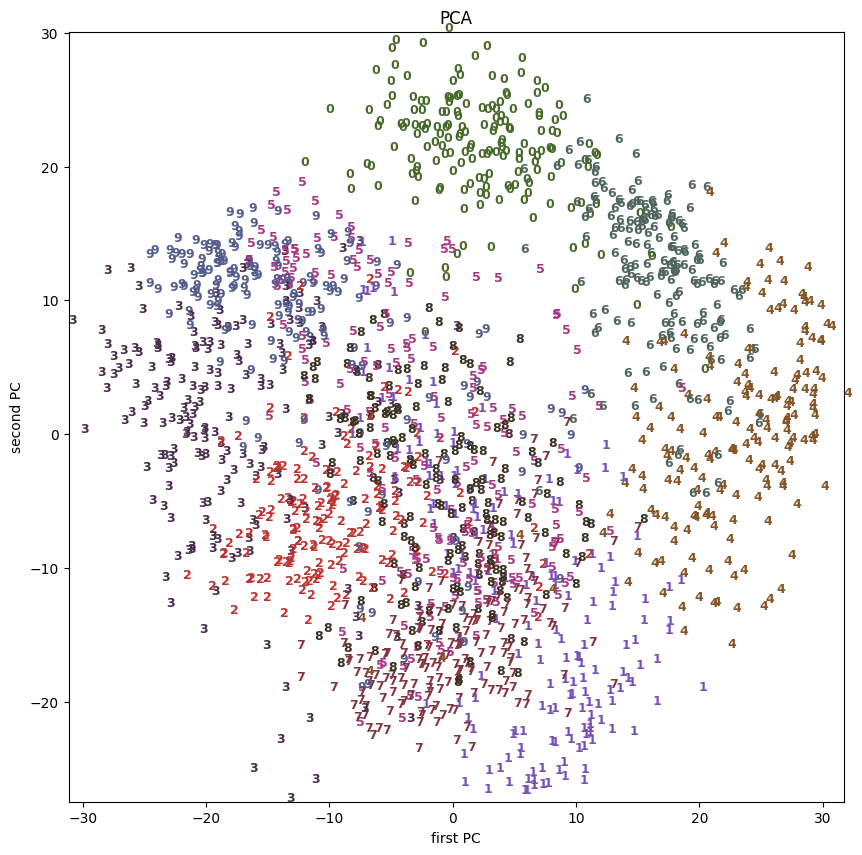

In [ ]:

import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import load_digits
digits = load_digits()

# print len(digits.data) #1797
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E']

t0=time()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("PCA time: ", time()-t0)
plt.show()